### Ejercicio MILP 02. Proceso por lotes (MILP)

Se dispone de dos unidades de producción (N1 y N2) que producen los productos 1 y 2, a partir de tres materias primas (A, B y C). La primera unidad, produce un máximo de 8000 lb/dia y la segunda 10000 lb/dia. Se sabe que para obtener una libra de producto 1, se requieren 0.4 lb de A y 0.6 lb de B. Para obtener una libra del producto 2 se requieren 0.3 lb de B y 0.7 lb de C. Se dispone de un máximo de 6000 lb/dia de B, pero no hay límites de A y C. Los beneficios unitarios del producto 1 y 2 son 0.16 y 0.20 €/lb. 

1. ¿Cuánto se debe producir de 1 y de 2, sabiendo que cada uno trabaja en producciones discontinuas de 2000 lb? 
2. Debido a una incidencia en la planta, solo se pueden producir un total de 5 lotes, ¿cuál es la producción óptima?
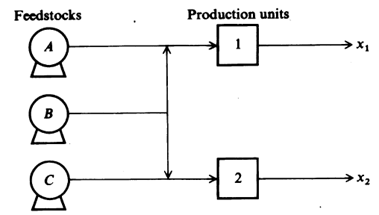

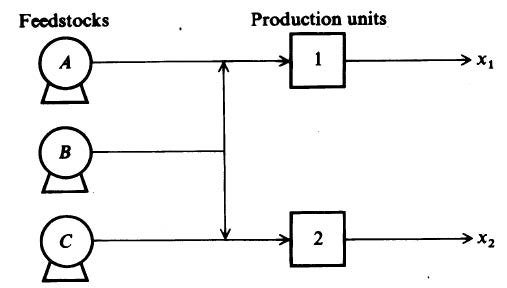

In [8]:
from IPython.display import Image 
Image(filename='img_enun/MILP2.jpg', width= 350)

$$
\begin{align}
	&\text{max }  &&  0.15x_1+0.2x_2  &&\\
	&\text{s.t. }  && x_1    =  2000y_1\\
	&  && x_2    =  2000y_2\\
    &  && 0.6x_1+0.3x_2 \le 6000 \\
    & && 0 \le  y_1\le 4 \\
    & && 0 \le  y_2\le 5 \\
    & && x_1,x_2 \ge 0\\
\end{align}
$$

In [9]:
from pyomo.environ import *
model=ConcreteModel()

In [10]:
model.x1=Var(within=NonNegativeReals)
model.x2=Var(within=NonNegativeReals)
model.y1=Var(within=PositiveIntegers,bounds=(0,4))
model.y2=Var(within=PositiveIntegers,bounds=(0,5))

model.obj = Objective(expr = 0.15*model.x1+0.2*model.x2, sense=maximize)

model.C1=Constraint(expr = model.x1==2000*model.y1)
model.C2=Constraint(expr = model.x2==2000*model.y2)
model.C3=Constraint(expr = 0.6*model.x1+0.3*model.x2 <= 6000)


results = SolverFactory('glpk').solve(model).write()
model.pprint()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 2600.0
  Upper bound: 2600.0
  Number of objectives: 1
  Number of constraints: 4
  Number of variables: 5
  Number of nonzeros: 7
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 3
      Number of created subproblems: 3
  Error rc: 0
  Time: 0.06192755699157715
# ----------------------------------------------------------
#   Solution Information
# -----------------------------------

#### Añadimos una restricción adicional para tener en cuenta que: $$y_1+y_2 \le 5$$

In [11]:
model.C4=Constraint(expr = model.y1+model.y2 <= 5)


results = SolverFactory('glpk').solve(model).write()
model.pprint()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 1900.0
  Upper bound: 1900.0
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 5
  Number of nonzeros: 9
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 1
      Number of created subproblems: 1
  Error rc: 0
  Time: 0.07280611991882324
# ----------------------------------------------------------
#   Solution Information
# -----------------------------------